<a href="https://colab.research.google.com/github/leesiri1004/Colab/blob/main/4_2_%EB%94%A5%EB%9F%AC%EB%8B%9DCNN%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
날짜 : 2021/02/08
이름 : 이슬이
내용 : 딥러닝 CNN 이미지 분류 실습하기
"""

'\n날짜 : 2021/02/08\n이름 : 이슬이\n내용 : 딥러닝 CNN 이미지 분류 실습하기\n'

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from sklearn.model_selection import train_test_split
from PIL import Image
tf.__version__

'2.4.1'

In [17]:
# 학습데이터 로드
(cifar_train_data, cifar_train_label), (cifar_test_data, cifar_test_label) = load_data()

In [18]:
# 데이터 형태 확인
print(cifar_train_data.shape)
print(cifar_train_label) # [6] => [0,0,0,0,0,0,1,0,0,0] [0] => [1,0,0,0,0,0,0,0,0,0]
print(cifar_train_label[49999][0])
cifar_train_label

(50000, 32, 32, 3)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
1


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

[16810  4582 16768 35280 38990 20147 20271 43899  6860]


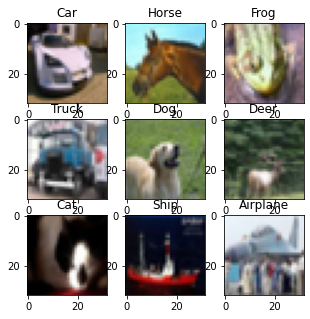

In [19]:
# 데이터 이미지 확인
data_labels = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
random_idx = np.random.randint(50000, size=9)
print(random_idx)

plt.figure(figsize=(5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)

  label = cifar_train_label[idx][0]
  plt.imshow(cifar_train_data[idx, :])
  plt.title('%s' % data_labels[label])

In [20]:
# 데이터의 레이블을 범주형(One-hot encoding) 형태로 변환
cifar_train_label = to_categorical(cifar_train_label)
cifar_test_label = to_categorical(cifar_test_label)

In [21]:
# 학습모델 설계
model = Sequential()

# CNN층
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

# DNN(FCNN : Full Connection Neural Network)
model.add(Flatten())
model.add(Dense(256, activation='relu'))    #은닉층
model.add(Dense(10, activation='softmax'))  #출력층

# 모델 요약확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

In [22]:
# 학습모델 설정
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [23]:
# 학습하기
model.fit(cifar_train_data, 
          cifar_train_label, 
          epochs=30, 
          batch_size=128)

Epoch 1/30
391/391 [==============================] - 5s 11ms/step - loss: 3.3402 - acc: 0.2323
Epoch 2/30
391/391 [==============================] - 4s 11ms/step - loss: 1.4432 - acc: 0.4752
Epoch 3/30
391/391 [==============================] - 4s 11ms/step - loss: 1.1792 - acc: 0.5816
Epoch 4/30
391/391 [==============================] - 4s 11ms/step - loss: 1.0151 - acc: 0.6419
Epoch 5/30
391/391 [==============================] - 4s 11ms/step - loss: 0.9105 - acc: 0.6792
Epoch 6/30
391/391 [==============================] - 4s 11ms/step - loss: 0.8231 - acc: 0.7112
Epoch 7/30
391/391 [==============================] - 4s 11ms/step - loss: 0.7691 - acc: 0.7326
Epoch 8/30
391/391 [==============================] - 4s 11ms/step - loss: 0.6923 - acc: 0.7561
Epoch 9/30
391/391 [==============================] - 4s 11ms/step - loss: 0.6590 - acc: 0.7686
Epoch 10/30
391/391 [==============================] - 4s 11ms/step - loss: 0.6346 - acc: 0.7774
Epoch 11/30
391/391 [==================

In [10]:
# 평가하기
model.evaluate(cifar_test_data, cifar_test_label)

313/313 [==============================] - 1s 3ms/step - loss: 11.4177 - acc: 0.1084


[11.417671203613281, 0.10840000212192535]

In [24]:
# 테스트하기
from sklearn.metrics import accuracy_score

result = model.predict(cifar_test_data)
result.round()

for i in range(9):
  print('i : ', i)
  print('결과 : ', result[i].round())
  print('정답 : ', cifar_test_label[i])

i :  0
결과 :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
정답 :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
i :  1
결과 :  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
정답 :  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
i :  2
결과 :  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
정답 :  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
i :  3
결과 :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
정답 :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
i :  4
결과 :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
정답 :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
i :  5
결과 :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
정답 :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
i :  6
결과 :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
정답 :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
i :  7
결과 :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
정답 :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
i :  8
결과 :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
정답 :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


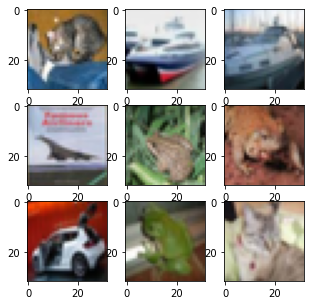

In [25]:
plt.figure(figsize=(5,5))

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(cifar_test_data[i])

plt.show()